# Econometric 322 Lab \#6: Basic Multiple Regression

# <font color = red> Collaboration Policy </font>

1. Study groups are allowed but I expect students to understand and complete their own assignments and to hand in one assignment per student.
    
2. If you worked in a group, please put the names of your study group on your assignment on top.
    
3. Just like all other classes at Rutgers, the student Honor Code is taken seriously.
    
The submitted assignmenst must be your work.

# <font color = red> Introduction </font>

## <font color = blue> Purpose </font>

The purpose of this lab is to allow you to build and analyze a multiple regression model for an actual problem.

At the end of this lab, you will be able to:

1. specify a multiple linear regression model for a problem;

2. estimate a multiple linear regression model in Pandas;

3. use dummy variables and interpret their impact;

3. interpret key statistics;

4. identify shortcomings in the proposed linear model;

5. summarize the regression output;

6. estimate elasticities and judge their reasonableness;

7. build a model portfolio.

## <font color = blue> Problem </font> 

Crime is a topic on everyones' mind.  Politicians historically have raised the issue at election time, pointing out that there is a serious crime problem and that only they can solve it - if elected.  We now, of course, have substituted the word "terriorism" for violent crime, but the effect is the same: we feel insecure in our own homes.  Crime is actually divided into categories, violent crime being just one.  In this lab, you will estimate a complex model to explain violent crime rates at the state level in the United States.

## <font color = blue> Assignment </font>

Using the Statistical Abstract of the U.S. (2012 edition), find the total violent crime rate data by state and collect data on each state for the total violent crimes in that state.  Collect data by state on the total unemployment rate,  Gross State Product (would you use Current or Real Dollars?), personal income (would you use Current or Real Dollars?), and one other variable of your choice that you believe affects violent crime.

The U.S is divided into four Census regions.  These can also be found online (google "MapStats: United States").  You previously used a file that mapped states to regions.  Merge this file with your DataFrame.  Create dummy variables for the regions and include the dummies in your models.

Be sure to graph your data and interpret the graphs. All graphs must be clearly labeled. 


# <font color = red> Documentation </font>

## <font color = blue> Abstract </font>

*In this lab, we looked at the relationship between violent crime, GDP Per Capita, Personal Income Per Capita, Unemployment, Region and Strictness of Gun Laws by state in 2009. Higher GDP Per Capita is positively correlated to violent crime, as more economic activity may mean more stores and businesses to rob. Higher Personal Income per Capita is negatively correlated to violent crime, as when one is making a lot of money, the opportunity cost of prison time increases, and thus the risks of getting arrested and convicted increase. Stricter gun laws are weakly negatively correlated with violent crime, as the harder it is to get guns to rob or assault people, the fewer people do it. The p-value of the test-statistics for gun law strictness, Personal Income Per Capita and GDP Per Capita were all very high, so we should not necessarily assume that those factors are relevant. Higher Rates of unemployment are correlated with higher amounts of violent crime, which makes sense as someone with a job has less need to supplement their income with crime. Region also matters. The most violent regions are the South, then the West, then the Midwest, than the East. This is more or less in line with the theory that hotter temperatures make people more violent. However, there are other factors that should be considered and further analysis may be necessary.*

## <font color = blue> Data Dictionary </font>

| Variable | Values   | Source | Mnemonic |
|----------|----------|--------|---------|
| March 2009 Unemployment Rate | State Civilian unemployment rate (%) | State Employment and Unemployment Archived News Releases | march |
| June 2009 Unemployment Rate | State Civilian unemployment rate (%) | State Employment and Unemployment Archived News Releases | june |
| September 2009 Unemployment Rate | State Civilian unemployment rate (%) | State Employment and Unemployment Archived News Releases | septem |
| December 2009 Unemployment Rate | State Civilian unemployment rate (%) | State Employment and Unemployment Archived News Releases | decemb |
| Average 2009 Unemployment Rate | State Civilian unemployment rate (%) | Average of March, June, September and December Unemployment Rates | unemp |
| Violent Crime | Rates per 100,000 population, 2009 | Statistical Abstract of the U.S. (2012 edition) | vcr |
| 2009 State Population | Population | US Census Bureau State Intercensal Tables: 2000-2010 | pop |
| State GDP | Nominal 2009 Dollars (In Millions) | BEA Regional Economic Accounts | sgdp |
| State GDP Per Capita | Nominal 2009 Dollars (In Thousands) | 1,000 x State GDP/Population | sgdppc |
| State Personal Income | Nominal 2009 Dollars (In Millions) | BEA Regional Economic Accounts | spi |
| State Personal Income Per Capita | Nominal 2009 Dollars (In Thousands) | 1,000 x State Personal Income/Population | spipc |
| Gun Law Strictness | Ranking of Strictness of Gun Laws by the Brady Campaign (0=loosest gun laws, 100=strictest) | Brady Campaign. 2010 ‘State Scorecard 2009.’ State Gun Laws: Find Out Where Your State Ranks in Strong Gun Laws and Learn About Those Laws. | guns |
| State Region | Qualitative |  "Census Bureau Regions and Divisions with State FIPS Codes" (PDF). US Census Bureau | west,south,east |

# <font color = red> Pre-lab Questions </font>

Before you do any work, please think about the relationship among these variables. In particular, think how you would answer the following if called on in class:

## <font color = blue> What type of data is this and why (i.e., source and domain)? </font>

This is cross-sectional data, because we're comparing a bunch of different states at the same point in time. It is secondary data, because all of it has been compiled from various government or nonprofit organizations.

## <font color = blue> What are good testable hypothesis?  Explain your testable hypotheses. </font>

As Unemployment increases, violent crime should increase, as unemployed people have little income, and may have to resort to crime to make ends meet. As GDP per capita increases, violent crime should decrease, as states with larger economies should have greater tax revenue to spend on law enforcement. As Personal Income increases, violent crime should also decrease, because a higher income raises the opportunity cost of spending time in prison as opposed to earning money. As Gun Law Strictness increases, violent crime should decrease, as less access to weaponry means fewer criminals have access to the necessary tools to commit crimes. I expect the South to be the most violent region, followed by the West the Northeast and the Midwest, as hotter temperatures make people more violent and prone to rash decisions like committing a crime.


## <font color = blue> Write a tentative <u>specific</u> model.  Explain your model.  </font>

*vcr=$\beta_0$+$\beta_1$unemp +$\beta_2$gdppc +$\beta_3$pcipc +$\beta_4$guns + $\gamma_5$west + $\gamma_6$east + $\gamma_7$south +$\epsilon$* <br>
Unemployment Rates are expected to be positively correlated with violent crime, as unemployed people will be more likely to commit crimes to make money. GDP Per Capita is expected to be negatively correlated with violent crime, as wealthier states will have more money to spend on law enforcement to prevent crime. Personal Income Per Capita is expected to be negatively correlated with violent crime, as the opportunity cost of prison increases as incomes increase. Gun law strictness is expected to be negatively correlated with crime, as fewer guns available means fewer guns to commit crimes with.

## <font color = blue> Write the statistical hypotheses to go along with your testable hypothesis.  Explain what you wrote.</font>

$H_O$ = Null Hypothesis: The Hypothesis that none of the Explanatory Variables influence Violent Crime <br>
$H_A$ = Alternative Hypothesis: The Hypothesis that at least one Explanatory Variable influences Violent Crime <br>
$H_O: \beta_1 = \beta_2 = \beta_3 =\beta_4 = \gamma_5 = \gamma_6 = \gamma_7= 0$

$H_A$: At least one $\beta_i  \neq 0$

# <font color = red> Tasks </font>

## <font color = blue> Load the Pandas, Seaborn, and Statsmodels packages and give them aliases.  You will also need the Statsmodels formula API for formulas.</font>

In [216]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf 
from statsmodels.iolib.summary2 import summary_col
from statsmodels.stats.diagnostic import het_white
from statsmodels.stats.api import anova_lm
import matplotlib.pyplot as plt
import seaborn as sns

## <font color = blue> Import the data.  Set the row index to the states. </font>

In [217]:
df=pd.merge(pd.read_csv("guns.csv",index_col="state"),pd.read_csv("decemb.csv",index_col="state"),left_index=True,right_index=True)

## <font color = blue> Import the state/region data and merge with your DataFrame.  Merge on the indexes of both DataFrames as you did in a prior lab.</font>

In [218]:
df=pd.merge(df,pd.read_csv("march.csv",index_col="state"),left_index=True,right_index=True)
df=pd.merge(df,pd.read_csv("june.csv",index_col="state"),left_index=True,right_index=True)
df=pd.merge(df,pd.read_csv("septem.csv",index_col="state"),left_index=True,right_index=True)
df=pd.merge(df,pd.read_csv("vcr.csv",index_col="state"),left_index=True,right_index=True)
df=pd.merge(df,pd.read_csv("spi.csv",index_col="state"),left_index=True,right_index=True)
df=pd.merge(df,pd.read_csv("sgdp.csv",index_col="state"),left_index=True,right_index=True)
df=pd.merge(df,pd.read_csv("pop.csv",index_col="state"),left_index=True,right_index=True)
df=pd.merge(df,pd.read_csv("region.csv",index_col="state"),left_index=True,right_index=True)
df['spipc']=1000*df['spi']/df['pop']
df['gdppc']=1000*df["gdp"]/df['pop']
df['unemp']=df['june']+df['march']+df['decemb']+df['septem']
df['unemp']=df['unemp']/4
del(df['june'])
del(df['march'])
del(df['decemb'])
del(df['septem'])
del(df["gdp"])
del(df['pop'])
del(df['spi'])
del(df["Region"])

## <font color = blue> Print the first five (5) records. </font>

In [219]:
df.head(5)

,guns,vcr,south,west,east,spipc,gdppc,unemp
state,,,,,,,,
Alabama,16,459.9,1,0,0,32.630664,35.382554,10.200
Alaska,2,632.6,0,1,0,46.858326,70.948998,8.525
Arizona,2,423.2,0,1,0,33.326906,38.455538,8.675
Arkansas,4,530.3,1,0,0,31.151999,33.505061,7.125
California,79,473.4,0,1,0,42.050270,51.947997,11.850


## <font color = blue> Graph the data. </font>

[Text(0,0.5,'Violent Crime Rate (per 100,000 people)'),
 Text(0.5,0,'Strictness of Gun Laws'),
 Text(0.5,1,'Gun Law Strictness vs. Violent Crime Rate')]

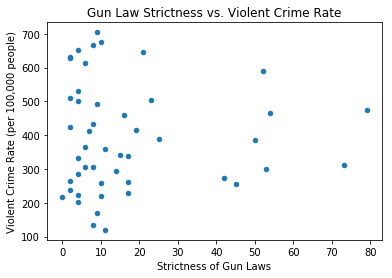

In [220]:
ax = df.plot( x = 'guns', y = 'vcr', legend = False, kind = 'scatter' )
ax.set( xlabel = 'Strictness of Gun Laws', ylabel = 'Violent Crime Rate (per 100,000 people)', title = 'Gun Law Strictness vs. Violent Crime Rate' )

[Text(0,0.5,'Violent Crime Rate (per 100,000 people)'),
 Text(0.5,0,'State Personal Income Per Capita (In Thousands of 2009 Dollars)'),
 Text(0.5,1,'State Personal Income Per Capita vs. Violent Crime Rate')]

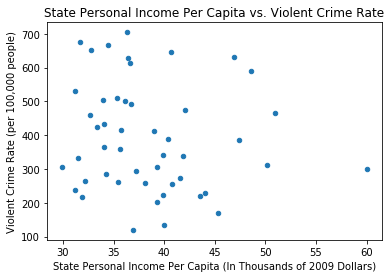

In [221]:
ax = df.plot( x = 'spipc', y = 'vcr', legend = False, kind = 'scatter' )
ax.set( xlabel = 'State Personal Income Per Capita (In Thousands of 2009 Dollars)', ylabel = 'Violent Crime Rate (per 100,000 people)', title = 'State Personal Income Per Capita vs. Violent Crime Rate' )

[Text(0,0.5,'Violent Crime Rate (per 100,000 people)'),
 Text(0.5,0,'State GDP Per Capita (In Thousands of 2009 Dollars)'),
 Text(0.5,1,'State GDP Per Capita vs. Violent Crime Rate')]

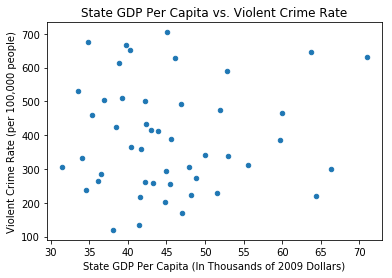

In [222]:
ax = df.plot( x = 'gdppc', y = 'vcr', legend = False, kind = 'scatter' )
ax.set( xlabel = 'State GDP Per Capita (In Thousands of 2009 Dollars)', ylabel = 'Violent Crime Rate (per 100,000 people)', title = 'State GDP Per Capita vs. Violent Crime Rate' )

[Text(0,0.5,'Violent Crime Rate (per 100,000 people)'),
 Text(0.5,0,'Unemployment Rate 2009'),
 Text(0.5,1,'Unemployment Rate vs. Violent Crime Rate')]

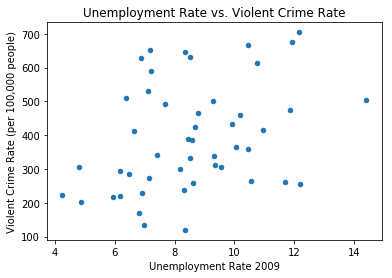

In [223]:
ax = df.plot( x = 'unemp', y = 'vcr', legend = False, kind = 'scatter' )
ax.set( xlabel = 'Unemployment Rate 2009', ylabel = 'Violent Crime Rate (per 100,000 people)', title = 'Unemployment Rate vs. Violent Crime Rate' )

## <font color = blue> Create a correlation matrix </font>

In [224]:
xc=df.corr()
xc

,guns,vcr,south,west,east,spipc,gdppc,unemp
guns,1.000000,-0.004948,-0.192765,-0.038852,0.493102,0.681706,0.501015,0.255746
vcr,-0.004948,1.000000,0.427937,-0.010096,-0.338155,-0.120822,0.047352,0.351081
south,-0.192765,0.427937,1.000000,-0.430946,-0.339683,-0.319495,-0.279893,0.127381
west,-0.038852,-0.010096,-0.430946,1.000000,-0.292770,-0.072201,0.140759,-0.012368
east,0.493102,-0.338155,-0.339683,-0.292770,1.000000,0.576287,0.296162,0.013126
spipc,0.681706,-0.120822,-0.319495,-0.072201,0.576287,1.000000,0.858790,-0.185159
gdppc,0.501015,0.047352,-0.279893,0.140759,0.296162,0.858790,1.000000,-0.203185
unemp,0.255746,0.351081,0.127381,-0.012368,0.013126,-0.185159,-0.203185,1.000000


## <font color = blue> Graph the correlation matrix. </font>

Text(0.5,1,'Heatmap of the Correlation Matrix')

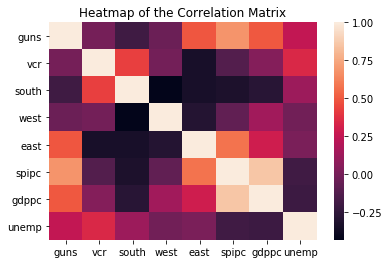

In [225]:
sns.heatmap(xc).set_title( 'Heatmap of the Correlation Matrix' )

## <font color = blue> Estimate a regression model with crime as the dependent variable.  Display the summary report.</font>

In [226]:
formula = 'vcr ~ guns + south + west + east + spipc +gdppc +unemp'
mod = smf.ols( formula, data = df )
reg02 = mod.fit()
print( reg02.summary() )

                            OLS Regression Results                            
Dep. Variable:                    vcr   R-squared:                       0.413
Model:                            OLS   Adj. R-squared:                  0.310
Method:                 Least Squares   F-statistic:                     4.020
Date:                Mon, 03 Dec 2018   Prob (F-statistic):            0.00203
Time:                        10:52:41   Log-Likelihood:                -298.05
No. Observations:                  48   AIC:                             612.1
Df Residuals:                      40   BIC:                             627.1
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -54.8459    264.409     -0.207      0.8

## <font color = blue> Test the null hypothesis that all dummies are statistically zero. </font>

In [227]:
hypothesis = ' ( south=0,west=0,east=0) '
f_test = reg02.f_test( hypothesis )
f_test.summary()

'<F test: F=array([[4.09410981]]), p=0.012619278278187781, df_denom=40, df_num=3>'

## <font color = blue>Estimate two additional models.</font>

In [228]:
formula03 = 'vcr ~ south + west + east + spipc +gdppc +unemp'
mod03 = smf.ols( formula03, data = df )
reg03 = mod03.fit()
print( reg03.summary() )

                            OLS Regression Results                            
Dep. Variable:                    vcr   R-squared:                       0.413
Model:                            OLS   Adj. R-squared:                  0.327
Method:                 Least Squares   F-statistic:                     4.804
Date:                Mon, 03 Dec 2018   Prob (F-statistic):           0.000856
Time:                        10:52:44   Log-Likelihood:                -298.06
No. Observations:                  48   AIC:                             610.1
Df Residuals:                      41   BIC:                             623.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -33.8741    191.223     -0.177      0.8

In [229]:
formula04 = 'vcr ~ guns + spipc +gdppc +unemp'
mod04 = smf.ols( formula04, data = df )
reg04 = mod04.fit()
print( reg04.summary() )

                            OLS Regression Results                            
Dep. Variable:                    vcr   R-squared:                       0.233
Model:                            OLS   Adj. R-squared:                  0.161
Method:                 Least Squares   F-statistic:                     3.261
Date:                Mon, 03 Dec 2018   Prob (F-statistic):             0.0202
Time:                        10:52:45   Log-Likelihood:                -304.48
No. Observations:                  48   AIC:                             619.0
Df Residuals:                      43   BIC:                             628.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    232.0243    258.626      0.897      0.3

## <font color = blue>Estimate a constant-only model (the restricted model).</font>

In [230]:
formula05 = 'vcr~1'
mod05 = smf.ols( formula05, data = df )
reg05 = mod05.fit()
print( reg05.summary() )

                            OLS Regression Results                            
Dep. Variable:                    vcr   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Mon, 03 Dec 2018   Prob (F-statistic):                nan
Time:                        10:52:46   Log-Likelihood:                -310.84
No. Observations:                  48   AIC:                             623.7
Df Residuals:                      47   BIC:                             625.5
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    391.7563     22.914     17.097      0.0

/Users/jamesbaker/miniconda3/envs/py3k/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1554: RuntimeWarning: invalid value encountered in double_scalars
  return self.ess/self.df_model


## <font color = blue>Compare your unrestricted model to the constant-only model (the restricted model).</font>

In [231]:
hypothesisA = '(south=0,west=0, east=0, spipc=0,gdppc=0,unemp=0,guns=0) '
##
## run and print test 
##
f_test = reg02.f_test( hypothesisA )
f_test.summary()

'<F test: F=array([[4.02018238]]), p=0.002034798933872873, df_denom=40, df_num=7>'

## <font color = blue> Calculate elasticities.</font>

In [232]:
par=reg02.params
par

Intercept    -54.845902
guns          -0.193996
south        123.242626
west           2.393828
east         -97.903714
spipc         -4.204332
gdppc          7.792427
unemp         27.313125
dtype: float64

In [233]:
gunsE=par[1]*(df.guns.mean()/df.vcr.mean())
spipcE=par[5]*(df.spipc.mean()/df.vcr.mean())
gdppcE=par[6]*(df.gdppc.mean()/df.vcr.mean())
unempE=par[7]*(df.unemp.mean()/df.vcr.mean())
print([gunsE,spipcE,gdppcE,unempE])
print([df.guns.mean(),df.spipc.mean(),df.gdppc.mean(),df.unemp.mean()])

[-0.008335793681363335, -0.41291320166142165, 0.9037788203335825, 0.5978100423816282]
[16.833333333333332, 38.47492075228776, 45.43654873370338, 8.574479166666666]


### Elasticities​ Summary Table

| Variable | Model | Estimate | Mean | Elasticity | Interpretation |
|---|---|---|---|---|---|
| guns | reg02 | -0.194 | 16.8333 | -0.0083 | Inealstic |
| spipc | reg02 | -4.2043 | 38.47492 | -0.4129 | Inelastic |
| gdppc | reg02 | 7.7924 | 45.4365 | 0.9038 | Inelastic |
| unemp | reg02 | 27.3131 | 8.5745 | 0.5978 | Inelastic |

## <font color = blue> Build a Model Portfolio.</font>

In [234]:
summary_col( [ reg02,reg03,reg04,reg05], stars = True, model_names=["reg02","reg03","reg04","reg05"],
           info_dict = {'n': lambda x: "{0:d}".format( int( x.nobs )),
                        'R2': lambda x: "{:0.3f}".format( x.rsquared ),
                         'R2 Adjusted': lambda x: "{:0.3f}".format( x.rsquared_adj ),
                         'AIC': lambda x: "{:0.3f}".format( x.aic ),
                         'BIC': lambda x: "{:0.3f}".format( x.bic ),
                        'F p-value': lambda x: "{:0.3f}".format( x.f_pvalue ),
})

,reg02,reg03,reg04,reg05
Intercept,-54.8459,-33.8741,232.0243,391.7563***
,(264.4090),(191.2229),(258.6263),(22.9137)
east,-97.9037,-98.4373,,
,(74.9612),(73.9155),,
gdppc,7.7924,7.9224,10.9387**,
,(5.0202),(4.8353),(4.6427),
guns,-0.1940,,-0.2215,
,(1.6662),,(1.8130),
south,123.2426**,122.6556**,,
,(54.4174),(53.5276),,


# <font color = red> Post-lab Questions </font>

## <font color = blue> What is the relationship between violent crime and the independent variables? Is this the relationship you expected?  Are your testable hypotheses supportable and why?</font>

There were some surprises. For example, increased GDP Per Capita is correlated with an increased in Violent Crime Rates. This may be because wealthier people have more valuable assets, so there is a higher reward for successfully robbing or mugging a rich person as opposed to a poor person. I was correct that higher personal income and lower unemployment are correlated with lower violent crime. While I was correct that stricter gun laws are correlated with less crime, the elasticity is almost 0 (e=-0.0083) and the strongest model is in fact the model that omits the strictness of gun laws as a variable. I conjecture that the reason strictness of gun laws has such a weak effect on crime is because laws that make it harder for criminals to get guns also make it harder for normal citizens to get guns which can be used for self-defense. Thus, increased access to firearms increases the risk of getting shot when attempting a robbery or assault, and would reduce crime. 
The only supportable testable Hypothesis is that Unemployment and violent crime are positively correlated. All the other variables had very high p-values throughout the models.

## <font color = blue>Interpret the regional dummy variables.  What do you conclude about their statistical significance?</font>

The South was the most violent, followed by the West and the Midwest. Region is statistically significant, as the worst-performing model, reg04, which omits the regional dummy variables, has the lowest r-squared adjusted (.161) of any of the not naive models. Performing an F-test for the Dummy Variables yielded p=0.01261<.05, so they are significant.

## <font color = blue> Interpret the $R^{2}$ and $R^{2}$ adjusted from the regression output. What do they say about your model? Which is the better measure and why?</font>

Both reg02 and reg03 have the same R-squared (.413), which is higher than the r-squared for reg04 (.233). However, R-squared inevitably increases when the amount of independent variables increases. Reg03 has fewer independent variables, and thus has the highest R-squared adjusted of any of the models. It is a better measure because r squared can be used to "cheat" because adding arbitrary variables will slightly increase it, even if those variables are garbage and actually make your model more complicated and less accurate.

## <font color = blue> How can you make the model better?  What additional variables can you think of that should be included? Defend your answer.</font>

This model could be improved by instead of comparing states, we had access to county data. More observations would make the model stronger. However, data on things such as real personal income or GDP can't always be found for every county in the United States. An additional variable that may impact violent crime could be education. In theory, better educated people have higher wages, and thus face a higher opportunity cost for going to prison, and will be less likely to commit crimes. This could be measured by either state high school graduation rates, or percentage of the adult population with a high school or bachelor's degree, or total education spending per capita.

## <font color = blue> Interpret the F-statistic from the regression output.  What hypothesis does it test?  What do you conclude about your model based on the F-statistic?  </font>

The probability of the F-statistic was .002 <.05, so we reject the Null Hypothesis that none of the independent variables have any influence. At least one of our variables must be significant, which was the alternative hypothesis. Our model is thus a better predictor of violent crime than the restricted model, where all the estimators are estimated to be 0.

## <font color = blue> Are violent crimes elastic or inelastic with respect to each of the independent variables?  Do they make sense?  Is it what you expect? Defend your answer. </font>

Violent Crime was inelastic with respect to each of the independent variables. For GDP Per Capita and Personal Income Per Capita this makes sense, as a 1% change in $45,000 or $38,000 a year is equivalent to making an extra $450 or $380 a year, which is a very small change in one's economic circumstances, and so not a huge amount of people would radically change their lifestyles if they started making an extra five or ten dollars a week, so violent crime would not really change. The inelasticity of unemployment to violent crime also makes sense, as the overwhelming amount of people, even when unemployed, would not resort to crime, choosing instead to find a new job or cut down on consumption, so crime would not increase that much with unemployment. Gun law strictness is almost completely uncorrelated with violent crime and the elasticity is close to 0, which I did not expect. However, gun laws may prevent as well as enable violent crime. Alternatively, areas with high levels of crime may pass more restrictive gun laws.

## <font color = blue> Interpret the correlation matrix </font>

The correlation matrix shows that there is very little collinearity between any of the variables. The strongest positive correlation was between GDP Per Capita and Personal Income Per Capita (r=.8588), which is not surprising, because most people's incomes come from working where they live. The weakest positive correlation was between GDP Per Capita and Violent Crime (r=.0474), which is in line with the inelasticity of violent crime with respect to GDP Per Capita. The strongest negative correlation was between GDP Per Capita and Unemployment (r=-.2032), which is in fact a validation of Okun's Law, that GDP and Unemployment are negatively related, and of course it's common sense that more people working means more economic activity. The weakest negative correlation was between Gun Law Strictness and Violent Crime Rates (r=-.005), as strict gun laws may not prevent crime, as armed citizens may be less likely to be victimized, or strict gun laws may be more common in high-crime areas, but at the same time strict gun laws can prevent criminals from acquiring the means to commit crimes.

## <font color = blue> What is the best model?  Basis?  Explain your answer. </font>

Whether we are trying to maximize Adjusted R-Squared or minimize AIC or minimize BIC, the best model, with the highest Adjusted R-squared (.327) and lowest AIC (610.118) and lowest BIC (623.216) is model reg03, which can be expressed as: <br>
*vcr=$\beta_0$+$\beta_1$unemp +$\beta_2$gdppc +$\beta_3$pcipc + $\gamma_5$west + $\gamma_6$east + $\gamma_7$south +$\epsilon$* <br>

## <font color = blue> What is the practical significance of your model? In other words, what can this be used for, it for anything at all? How would you answer the question: "<i>So what?</i>" Defend your answer. </font>

Violent Crime can be a serious impediment for a business. A business that built its new headquarters in some place with high levels of violent crime may have trouble attracting talent and may find its assets stolen or damaged. Knowing what areas are safe to operate and expand one's firm is very important in order to make the right business decisions.